Master Data & Notebook for Mult Fleets Plots
**Author:** Carlos Guirado
**Date:** Jul 2023
**Objective:** Imports csv files consolidated by Solo/Pooled RH and time period and produces summaries and plots.

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
from zipfile import ZipFile
import io

Part 1: Processing wait time skims

In [2]:
# Select time period
period = 'pm'

# options: 'am', 'pm', 'ev', 'md', 'ea'

In [3]:
combined_csv_pooled = pd.read_csv(f'all_waits_pooled_{period}.csv')

In [4]:
# range 3 to 45
s = pd.Series(range(3,45))

In [5]:
s2 = (s.repeat(8)).to_list()

In [6]:
combined_csv_pooled['run'] = s2

In [7]:
df_pooled = combined_csv_pooled.pivot(index='run', columns='Unnamed: 0', values='1')

In [8]:
df_pooled_median = df_pooled.iloc[:,1]

In [9]:
df_pooled_median.to_csv('df_pooled_median_waits.csv')

In [10]:
combined_csv_solo = pd.read_csv(f'all_waits_solo_{period}.csv')

In [11]:
combined_csv_solo['run'] = s2

In [12]:
df_solo = combined_csv_solo.pivot(index='run', columns='Unnamed: 0', values='1')

In [13]:
df_solo_median = df_solo.iloc[:,1]
df_solo_median.to_csv('df_solo_median_waits.csv')

Part 2: Wait time Charts

In [14]:
# See spreadsheet for levels included herein

In [15]:
# Levers:
# 1. Number of fleets
# 2. RH Solo price
# 3. RH Pooled price
# 4. Total fleet size
# AUX: Type of test carried out

In [16]:
n_fleets = [1,
2,
5,
5,
5,
5,
5,
2,
2,
2,
2,
2,
5,
5,
5,
5,
5,
2,
5,
5,
5,
5,
5,
2,
5,
5,
5,
5,
5,
2,
5,
5,
5,
5,
5,
1,
2,
5,
5,
5,
5,
5]

In [17]:
size=['100%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%']

In [18]:
price_solo=['100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'47%',
'47%',
'47%',
'47%',
'47%',
'47%',
'27%',
'27%',
'27%',
'27%',
'27%',
'27%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%']

In [19]:
price_pooled=[
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'47%',
'47%',
'47%',
'47%',
'47%',
'47%',
'27%',
'27%',
'27%',
'27%',
'27%',
'27%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'0%',
'0%',
'0%',
'0%',
'0%',
'0%',
'0%']

In [20]:
#test=['baseline','price','price','price','price','price','price','price','price','size','size','size','size','size','size','size']

In [21]:
df_solo['price_solo'] = price_solo
df_solo['price_pooled'] = price_pooled
df_solo['size'] = size
df_solo['n_fleets'] = n_fleets
#df_solo['test'] = test
df_pooled['price_solo'] = price_solo
df_pooled['price_pooled'] = price_pooled
df_pooled['size'] = size
df_pooled['n_fleets'] = n_fleets
#df_solo['test'] = test

In [22]:
df_solo['Type']='RH solo'
df_pooled['Type']='RH pooled'

In [23]:
df_solo.apply(pd.to_numeric, errors='ignore').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 3 to 44
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   25%           42 non-null     float64
 1   50%           42 non-null     float64
 2   75%           42 non-null     float64
 3   count         42 non-null     float64
 4   max           42 non-null     float64
 5   mean          42 non-null     float64
 6   min           42 non-null     float64
 7   std           42 non-null     float64
 8   price_solo    42 non-null     object 
 9   price_pooled  42 non-null     object 
 10  size          42 non-null     object 
 11  n_fleets      42 non-null     int64  
 12  Type          42 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 4.6+ KB


In [24]:
df_pooled.apply(pd.to_numeric, errors='ignore').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 3 to 44
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   25%           42 non-null     float64
 1   50%           42 non-null     float64
 2   75%           42 non-null     float64
 3   count         42 non-null     float64
 4   max           42 non-null     float64
 5   mean          42 non-null     float64
 6   min           42 non-null     float64
 7   std           42 non-null     float64
 8   price_solo    42 non-null     object 
 9   price_pooled  42 non-null     object 
 10  size          42 non-null     object 
 11  n_fleets      42 non-null     int64  
 12  Type          42 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 4.6+ KB


In [25]:
df_pooled['price_solo'] = df_pooled['price_solo'].str.rstrip("%").astype(float)/100
df_pooled['price_pooled'] = df_pooled['price_pooled'].str.rstrip("%").astype(float)/100

In [26]:
df_pooled['size'] = df_pooled['size'].str.rstrip("%").astype(float)/100

In [27]:
df_solo['size'] = df_solo['size'].str.rstrip("%").astype(float)/100

In [28]:
df_solo['price_solo'] = df_solo['price_solo'].str.rstrip("%").astype(float)/100
df_solo['price_pooled'] = df_solo['price_pooled'].str.rstrip("%").astype(float)/100

In [29]:
# Calculate % change in median wait time wrt baseline with 2 fleets (row 4 in spreadsheet)

In [30]:
df_pooled['pc_diff']=((df_pooled['50%']-df_pooled['50%'].iloc[1])/df_pooled['50%'].iloc[1]*100)

In [31]:
df_solo['pc_diff']=((df_solo['50%']-df_solo['50%'].iloc[1])/df_solo['50%'].iloc[1]*100)

In [32]:
# preview
df_pooled

Unnamed: 0,25%,50%,75%,count,max,mean,min,std,price_solo,price_pooled,size,n_fleets,Type,pc_diff
run,,,,,,,,,,,,,,
3,1.811420,2.355212,3.046721,1400.0,14.933333,2.620003,0.016667,1.344462,1.0000,1.0000,1.00,1,RH pooled,-9.414930
4,2.092276,2.600000,3.262733,1401.0,12.783334,2.851846,0.016667,1.265736,1.0000,1.0000,1.00,2,RH pooled,0.000000
5,2.208314,2.742675,3.430801,1400.0,10.210417,2.943256,0.016667,1.222022,1.0000,1.0000,1.00,5,RH pooled,5.487516
6,1.785431,2.256888,2.942042,1407.0,11.972222,2.496655,0.016667,1.157537,1.0000,1.0000,1.64,5,RH pooled,-13.196625
7,1.589652,2.055312,2.692280,1406.0,11.766666,2.307521,0.316667,1.231138,1.0000,1.0000,2.00,5,RH pooled,-20.949548
8,0.935249,1.312462,1.794091,1409.0,10.287009,1.574233,0.066667,1.099043,1.0000,1.0000,4.00,5,RH pooled,-49.520696
9,0.529148,0.717090,1.037322,1410.0,9.961267,1.007195,0.000000,1.028078,1.0000,1.0000,10.00,5,RH pooled,-72.419631
10,1.621022,2.095170,2.765986,1407.0,9.838097,2.362417,0.016667,1.180077,1.0000,1.0000,1.64,2,RH pooled,-19.416535
11,1.377838,1.825380,2.482167,1408.0,10.950000,2.100114,0.326190,1.214571,1.0000,1.0000,2.00,2,RH pooled,-29.793076


In [33]:
df_solo

Unnamed: 0,25%,50%,75%,count,max,mean,min,std,price_solo,price_pooled,size,n_fleets,Type,pc_diff
run,,,,,,,,,,,,,,
3,2.500000,3.575000,4.783340,1263.0,14.083333,3.758388,0.0,1.945719,1.0000,1.0000,1.00,1,RH solo,5.239488
4,2.283333,3.397014,4.617778,1276.0,13.983334,3.579523,0.0,1.951766,1.0000,1.0000,1.00,2,RH solo,0.000000
5,2.033333,3.025000,4.331667,1262.0,13.683333,3.353900,0.0,1.974348,1.0000,1.0000,1.00,5,RH solo,-10.951201
6,2.137292,2.998958,4.059028,1344.0,14.283334,3.261222,0.0,1.772646,1.0000,1.0000,1.64,5,RH solo,-11.717808
7,2.105238,2.936932,3.867709,1346.0,12.366667,3.140928,0.0,1.634482,1.0000,1.0000,2.00,5,RH solo,-13.543720
8,2.004762,2.748016,3.616671,1393.0,14.000000,2.950662,0.0,1.599527,1.0000,1.0000,4.00,5,RH solo,-19.104942
9,1.837180,2.602778,3.390275,1401.0,14.900000,2.758044,0.0,1.436002,1.0000,1.0000,10.00,5,RH solo,-23.380422
10,2.516668,3.472909,4.534950,1355.0,14.283334,3.615562,0.0,1.751481,1.0000,1.0000,1.64,2,RH solo,2.234170
11,2.424161,3.323959,4.258333,1372.0,14.133333,3.474232,0.0,1.685791,1.0000,1.0000,2.00,2,RH solo,-2.150549


In [34]:
# Set styles

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

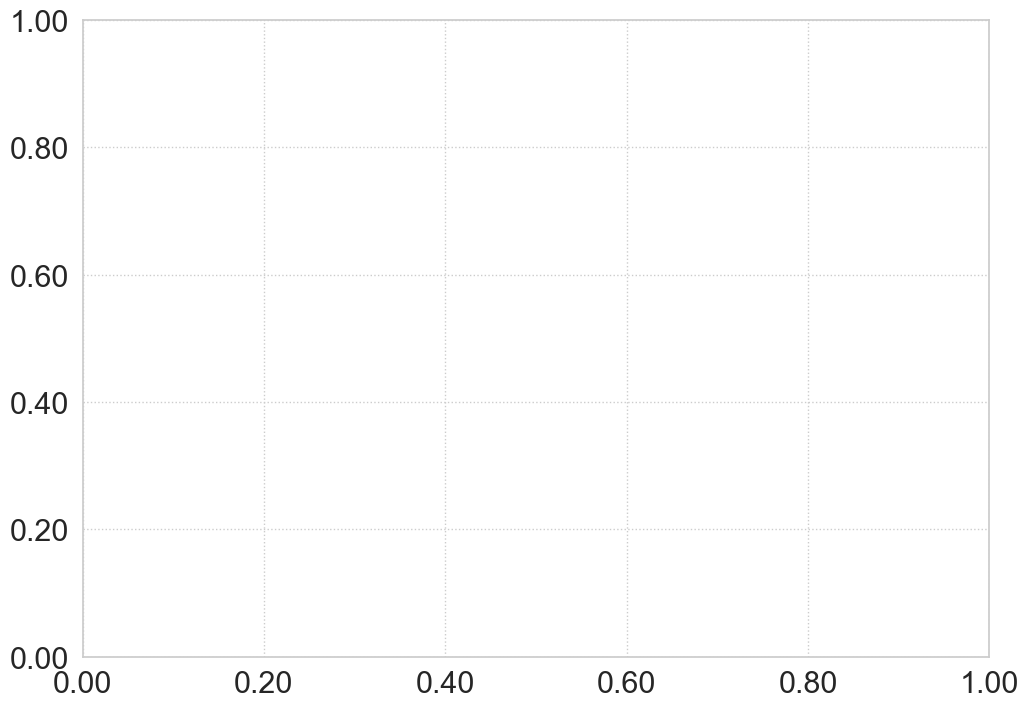

In [36]:
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid",{ "grid.linestyle": ":"})
plt.rc('legend', fontsize= 22)
plt.rc('xtick', labelsize= 22)    # fontsize of the tick labels
plt.rc('ytick', labelsize= 22)    # fontsize of the tick labels
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

In [37]:
markersize = 18
marker = '.'
color = 'b'
linewidth = 3.0
size = 22 # for labels

Joint - as line plots

In [38]:
df_joint = pd.concat([df_solo, df_pooled])
#df_joint=df_joint.iloc[:,-5:]
df_joint

Unnamed: 0,25%,50%,75%,count,max,mean,min,std,price_solo,price_pooled,size,n_fleets,Type,pc_diff
run,,,,,,,,,,,,,,
3,2.500000,3.575000,4.783340,1263.0,14.083333,3.758388,0.000000,1.945719,1.0,1.0,1.00,1,RH solo,5.239488
4,2.283333,3.397014,4.617778,1276.0,13.983334,3.579523,0.000000,1.951766,1.0,1.0,1.00,2,RH solo,0.000000
5,2.033333,3.025000,4.331667,1262.0,13.683333,3.353900,0.000000,1.974348,1.0,1.0,1.00,5,RH solo,-10.951201
6,2.137292,2.998958,4.059028,1344.0,14.283334,3.261222,0.000000,1.772646,1.0,1.0,1.64,5,RH solo,-11.717808
7,2.105238,2.936932,3.867709,1346.0,12.366667,3.140928,0.000000,1.634482,1.0,1.0,2.00,5,RH solo,-13.543720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,2.362499,3.016653,3.836667,1369.0,11.544445,3.250193,0.033333,1.380365,1.0,0.0,1.00,5,RH pooled,16.025113
41,2.141356,2.675594,3.327397,1388.0,14.066667,2.865655,0.016667,1.281462,1.0,0.0,1.64,5,RH pooled,2.907478
42,2.120439,2.624905,3.397937,1394.0,14.383333,2.877239,0.050000,1.268743,1.0,0.0,2.00,5,RH pooled,0.957897


In [39]:
# For the paper, we are plotting up to 4 (fleet_size multiplier)

In [40]:
df_joint_full = df_joint
df_joint = df_joint[df_joint['size'] < 5]

In [41]:
df_joint['pc_diff'] = df_joint['pc_diff'] / 100

C:\Users\cguirado\AppData\Local\Temp\2\ipykernel_5768\3840734365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joint['pc_diff'] = df_joint['pc_diff'] / 100


In [42]:
# Choose parameters
n_fleets_1 = 2
n_fleets_2 = 5
price_rh_solo = 1
price_rh_pooled = 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


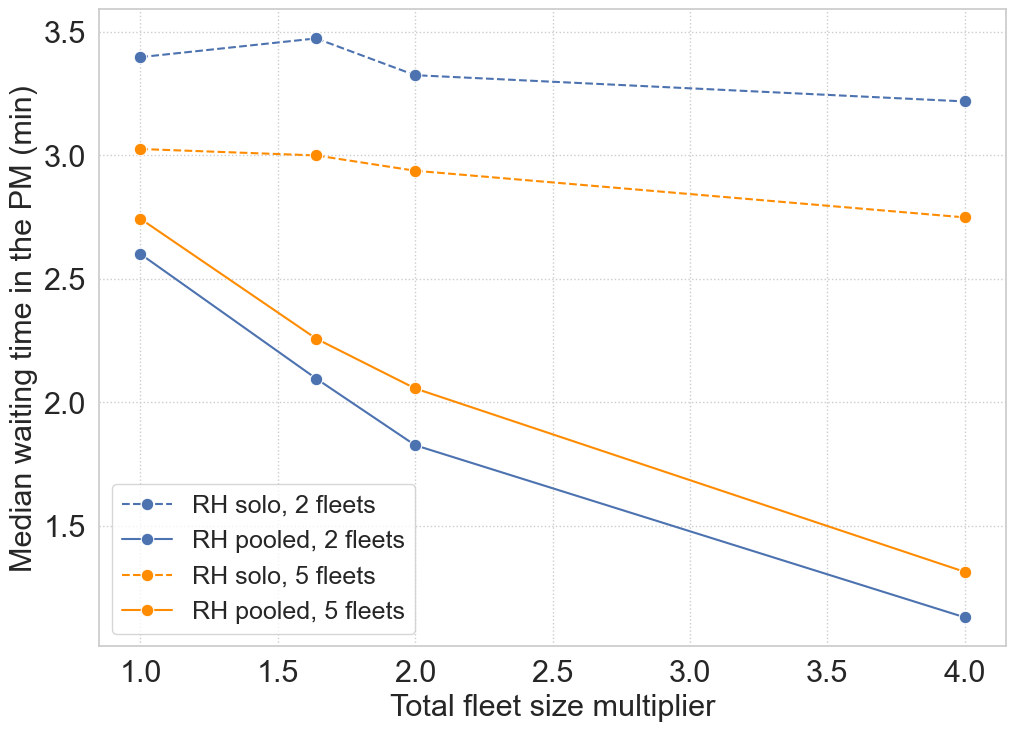

In [43]:
ax =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH solo') & 
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle='--',
    label=f"RH solo, {n_fleets_1} fleets")

ax1 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'b',
    label=f'RH pooled, {n_fleets_1} fleets')

ax2 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH solo') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f'RH solo, {n_fleets_2} fleets')

ax3 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    label=f'RH pooled, {n_fleets_2} fleets')

plt.ylabel('Median waiting time in the PM (min)', size=size)
plt.xlabel('Total fleet size multiplier', size=size)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [44]:
# As % difference from baseline

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


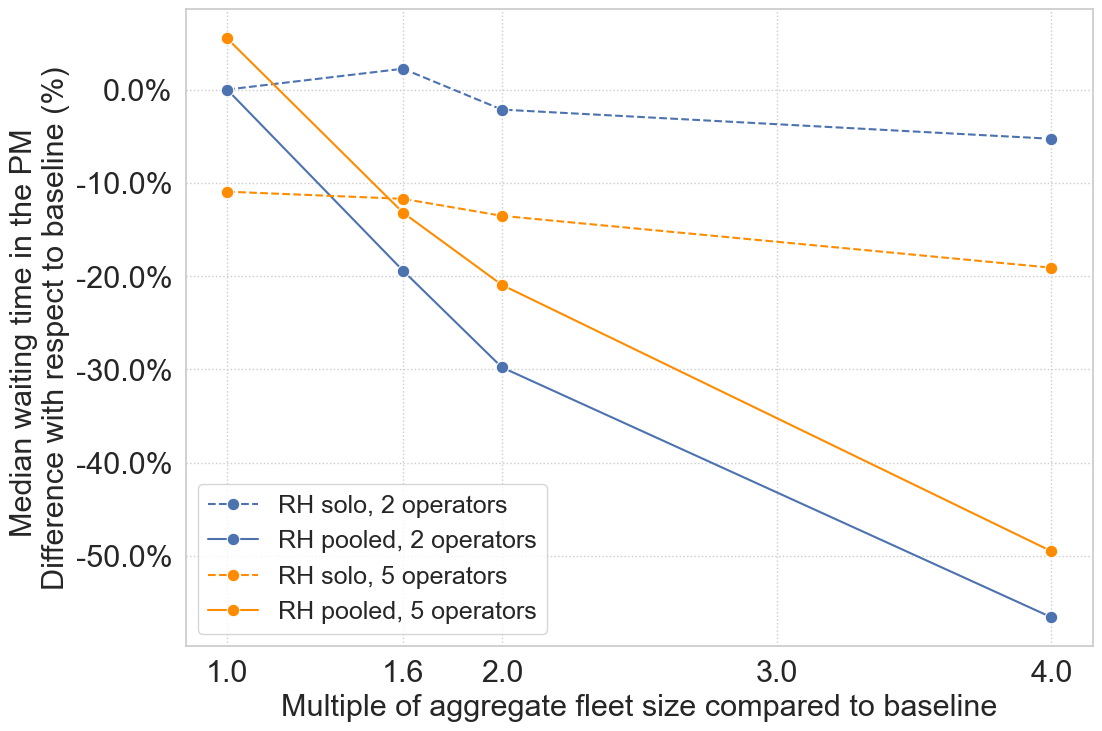

In [45]:
ax =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH solo') & 
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle='--',
    label=f"RH solo, {n_fleets_1} operators")

ax1 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'b',
    label=f'RH pooled, {n_fleets_1} operators')

ax2 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH solo') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f'RH solo, {n_fleets_2} operators')

ax3 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    label=f'RH pooled, {n_fleets_2} operators')
ax1.set_xticks([1.0,1.64,2.0,3.0,4.0])
plt.ylabel('Median waiting time in the PM \nDifference with respect to baseline (%)', size=size)
plt.xlabel('Multiple of aggregate fleet size compared to baseline', size=size)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1%}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


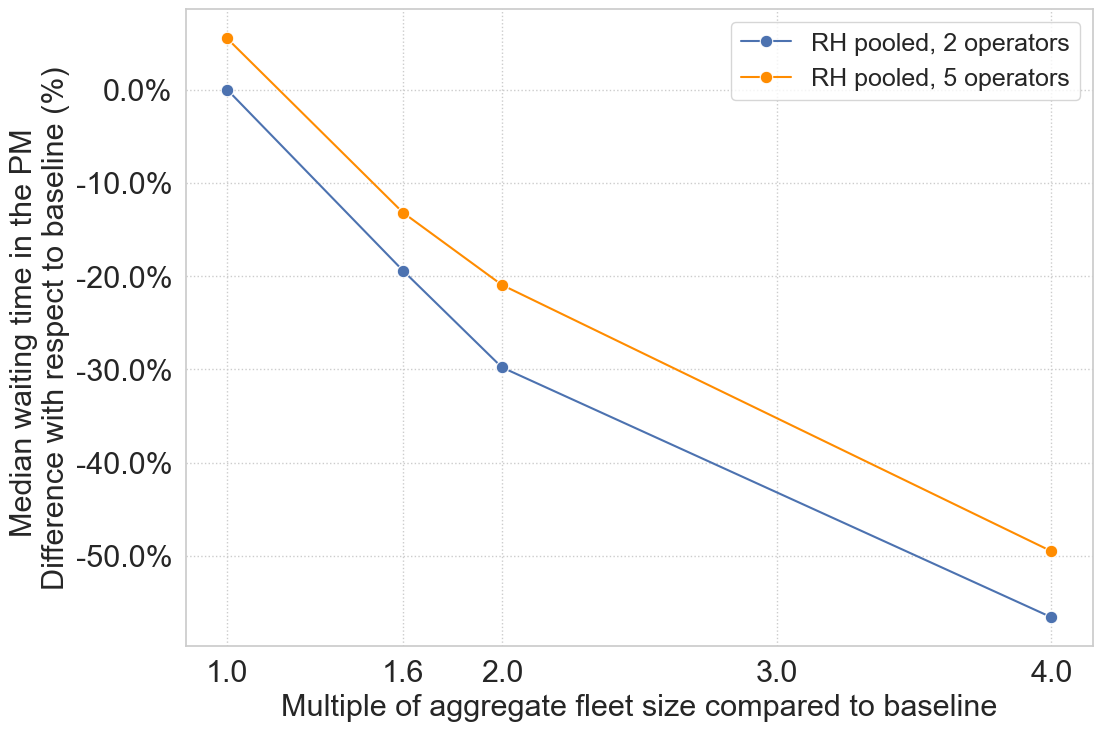

In [46]:
#ax =sns.lineplot(
#    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH solo') & 
#                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
#    x="size", 
#    y="pc_diff",
#    marker = marker,
#    markersize = markersize,
#    color = 'b',
#    linestyle='--',
#    label=f"RH solo, {n_fleets_1} operators")

ax1 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'b',
    label=f'RH pooled, {n_fleets_1} operators')

#ax2 =sns.lineplot(
    #data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH solo') &
                     #(df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    #x="size", 
    #y="pc_diff",
    #marker = marker,
    #markersize = markersize,
    #color = 'darkorange',
    #linestyle='--',
    #label=f'RH solo, {n_fleets_2} operators')

ax3 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    label=f'RH pooled, {n_fleets_2} operators')
ax1.set_xticks([1.0,1.64,2.0,3.0,4.0])
plt.ylabel('Median waiting time in the PM \nDifference with respect to baseline (%)', size=size)
plt.xlabel('Multiple of aggregate fleet size compared to baseline', size=size)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1%}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


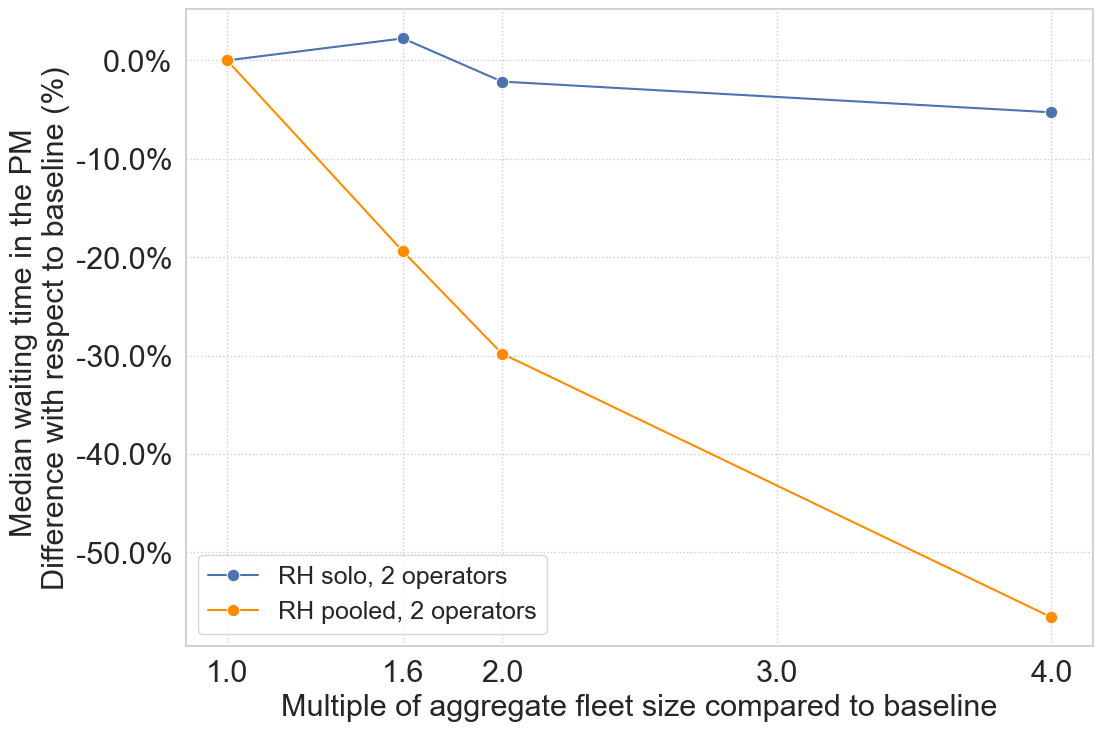

In [47]:
ax =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH solo') & 
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'b',
#    linestyle='--',
    label=f"RH solo, {n_fleets_1} operators")

ax3 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    label=f'RH pooled, {n_fleets_1} operators')
ax.set_xticks([1.0,1.64,2.0,3.0,4.0])
plt.ylabel('Median waiting time in the PM \nDifference with respect to baseline (%)', size=size)
plt.xlabel('Multiple of aggregate fleet size compared to baseline', size=size)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1%}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [48]:
# Choose parameters
n_fleets_1 = 5
n_fleets_2 = 5
price_1 = 0.125
price_2 = 0.47

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


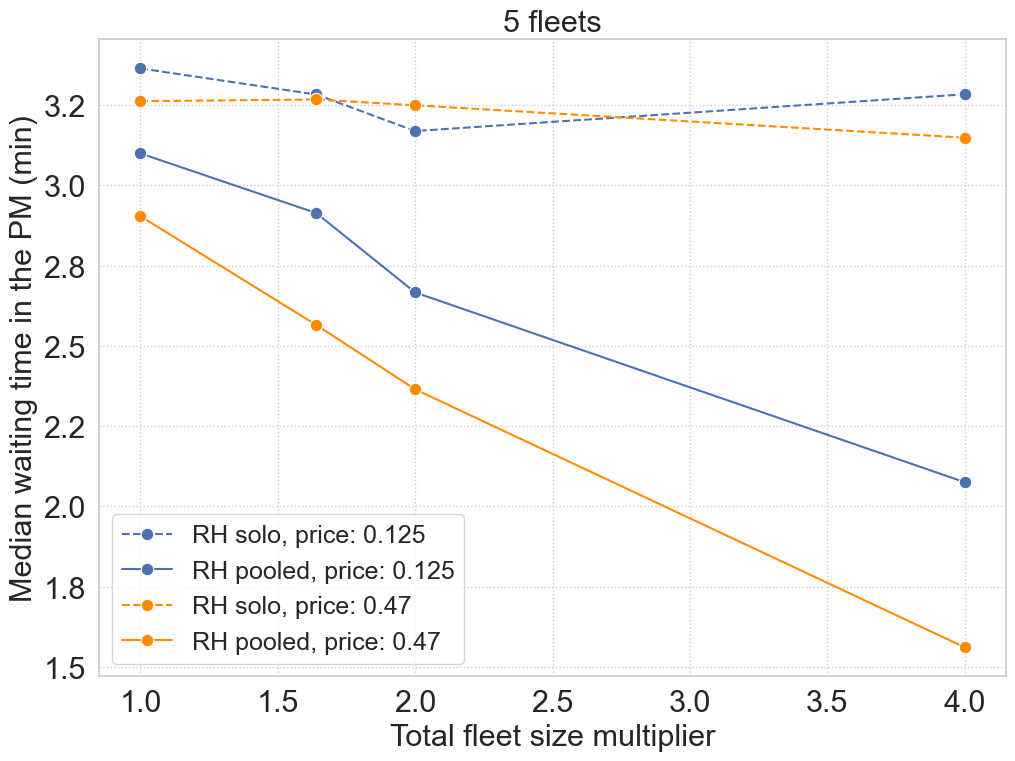

In [49]:
ax =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH solo') & 
                     (df_joint['price_solo'] == price_1) & (df_joint['price_pooled'] == price_1)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle='--',
    label=f"RH solo, price: {price_1}")

ax1 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_1) & (df_joint['price_pooled'] == price_1)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'b',
    label=f'RH pooled, price: {price_1}')

ax2 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH solo') &
                     (df_joint['price_solo'] == price_2) & (df_joint['price_pooled'] == price_2)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f'RH solo, price: {price_2}')

ax3 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_2) & (df_joint['price_pooled'] == price_2)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    label=f'RH pooled, price: {price_2}')

plt.ylabel('Median waiting time in the PM (min)', size=size)
plt.xlabel('Total fleet size multiplier', size=size)
plt.title(f'{n_fleets_1} fleets', size=22)
plt.legend(fontsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [50]:
#To export dataframe
#df_joint.to_csv(f'joint_waits_{period}.csv')

In [51]:
constant_price=pd.read_csv('constant_price.csv')

In [52]:
constant_price.head()

,Unnamed: 0,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,...,Ride Hail Pooled_Diff,Drive-Transit_Diff,Bike-Transit_Diff,Car Modes_Diff,lever_n_fleets,lever_position_fltsz,lever_position_price,Pooling Success Rate,dead_vmt_pc_diff,vmt_pc_diff
0,Baseline,1,1.00,1.0,1.0,1937432,3.837654,17844548,7435193,7604885,...,-0.002594,-0.000031,-0.000009,0.018998,1,1.00,1.0,0.438134,-0.302402,-0.004827
1,1Fl 1Pr 1Flz,2,1.00,1.0,1.0,1937360,3.839641,17848430,7438766,7606010,...,-0.002821,-0.000033,-0.000008,0.018705,2,1.00,1.0,0.417029,-0.327539,-0.004298
2,5Fl 1Pr 1Flz,5,1.00,1.0,1.0,1937424,3.839002,17855388,7437774,7611958,...,-0.002340,-0.000037,-0.000011,0.019491,5,1.00,1.0,0.445730,-0.296805,-0.002999
3,5Fl 1Pr 1.6Flz,5,1.64,1.0,1.0,1937388,3.839239,17846876,7438096,7608110,...,-0.002586,-0.000035,-0.000010,0.018946,5,1.64,1.0,0.552347,0.019646,-0.002111
4,2Fl 1Pr 1.6Flz,2,1.64,1.0,1.0,1937567,3.839957,17832089,7440173,7604317,...,-0.002865,-0.000029,-0.000007,0.018269,2,1.64,1.0,0.536034,0.000000,0.000000


In [53]:
constant_price

,Unnamed: 0,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,...,Ride Hail Pooled_Diff,Drive-Transit_Diff,Bike-Transit_Diff,Car Modes_Diff,lever_n_fleets,lever_position_fltsz,lever_position_price,Pooling Success Rate,dead_vmt_pc_diff,vmt_pc_diff
0,Baseline,1,1.00,1.0,1.0,1937432,3.837654,17844548,7435193,7604885,...,-0.002594,-0.000031,-0.000009,0.018998,1,1.00,1.0,0.438134,-0.302402,-0.004827
1,1Fl 1Pr 1Flz,2,1.00,1.0,1.0,1937360,3.839641,17848430,7438766,7606010,...,-0.002821,-0.000033,-0.000008,0.018705,2,1.00,1.0,0.417029,-0.327539,-0.004298
2,5Fl 1Pr 1Flz,5,1.00,1.0,1.0,1937424,3.839002,17855388,7437774,7611958,...,-0.002340,-0.000037,-0.000011,0.019491,5,1.00,1.0,0.445730,-0.296805,-0.002999
3,5Fl 1Pr 1.6Flz,5,1.64,1.0,1.0,1937388,3.839239,17846876,7438096,7608110,...,-0.002586,-0.000035,-0.000010,0.018946,5,1.64,1.0,0.552347,0.019646,-0.002111
4,2Fl 1Pr 1.6Flz,2,1.64,1.0,1.0,1937567,3.839957,17832089,7440173,7604317,...,-0.002865,-0.000029,-0.000007,0.018269,2,1.64,1.0,0.536034,0.000000,0.000000
5,5Fl 1Pr 2Flz,5,2.00,1.0,1.0,1937426,3.839440,17830954,7438630,7602653,...,-0.002641,-0.000034,-0.000010,0.018225,5,2.00,1.0,0.591631,0.200174,-0.001342
6,2Fl 1Pr 2Flz,2,2.00,1.0,1.0,1937443,3.838790,17815656,7437437,7595005,...,-0.002834,-0.000031,-0.000017,0.017494,2,2.00,1.0,0.586102,0.139467,-0.002207
7,5Fl 1Pr 4Flz,5,4.00,1.0,1.0,1937273,3.842128,17807999,7443250,7579169,...,-0.002065,-0.000026,-0.000006,0.014978,5,4.00,1.0,0.750992,1.181559,0.000958
8,2Fl 1Pr 4Flz,2,4.00,1.0,1.0,1937386,3.842638,17800479,7444674,7575283,...,-0.002215,-0.000032,-0.000003,0.014379,2,4.00,1.0,0.749011,1.133359,0.002301
9,5Fl 1Pr 10Flz,5,10.00,1.0,1.0,1937346,3.842776,17819919,7444787,7548422,...,-0.001087,-0.000033,-0.000002,0.011356,5,10.00,1.0,0.886803,5.330477,0.026856


In [54]:
constant_price['dead_vmt_pc_diff']=((constant_price['Length Vehicle SUM Empty Ride Hail [km]']-constant_price['Length Vehicle SUM Empty Ride Hail [km]'].iloc[1])/constant_price['Length Vehicle SUM Empty Ride Hail [km]'].iloc[1]) # minus baseline
constant_price['vmt_pc_diff']=((constant_price['Length VehicleSUM [km]']-constant_price['Length VehicleSUM [km]'].iloc[1])/constant_price['Length VehicleSUM [km]'].iloc[1]) # minus baseline


In [55]:
constant_price

,Unnamed: 0,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,...,Ride Hail Pooled_Diff,Drive-Transit_Diff,Bike-Transit_Diff,Car Modes_Diff,lever_n_fleets,lever_position_fltsz,lever_position_price,Pooling Success Rate,dead_vmt_pc_diff,vmt_pc_diff
0,Baseline,1,1.00,1.0,1.0,1937432,3.837654,17844548,7435193,7604885,...,-0.002594,-0.000031,-0.000009,0.018998,1,1.00,1.0,0.438134,0.037379,-0.000531
1,1Fl 1Pr 1Flz,2,1.00,1.0,1.0,1937360,3.839641,17848430,7438766,7606010,...,-0.002821,-0.000033,-0.000008,0.018705,2,1.00,1.0,0.417029,0.000000,0.000000
2,5Fl 1Pr 1Flz,5,1.00,1.0,1.0,1937424,3.839002,17855388,7437774,7611958,...,-0.002340,-0.000037,-0.000011,0.019491,5,1.00,1.0,0.445730,0.045703,0.001304
3,5Fl 1Pr 1.6Flz,5,1.64,1.0,1.0,1937388,3.839239,17846876,7438096,7608110,...,-0.002586,-0.000035,-0.000010,0.018946,5,1.64,1.0,0.552347,0.516289,0.002197
4,2Fl 1Pr 1.6Flz,2,1.64,1.0,1.0,1937567,3.839957,17832089,7440173,7604317,...,-0.002865,-0.000029,-0.000007,0.018269,2,1.64,1.0,0.536034,0.487074,0.004317
5,5Fl 1Pr 2Flz,5,2.00,1.0,1.0,1937426,3.839440,17830954,7438630,7602653,...,-0.002641,-0.000034,-0.000010,0.018225,5,2.00,1.0,0.591631,0.784748,0.002968
6,2Fl 1Pr 2Flz,2,2.00,1.0,1.0,1937443,3.838790,17815656,7437437,7595005,...,-0.002834,-0.000031,-0.000017,0.017494,2,2.00,1.0,0.586102,0.694472,0.002100
7,5Fl 1Pr 4Flz,5,4.00,1.0,1.0,1937273,3.842128,17807999,7443250,7579169,...,-0.002065,-0.000026,-0.000006,0.014978,5,4.00,1.0,0.750992,2.244140,0.005278
8,2Fl 1Pr 4Flz,2,4.00,1.0,1.0,1937386,3.842638,17800479,7444674,7575283,...,-0.002215,-0.000032,-0.000003,0.014379,2,4.00,1.0,0.749011,2.172463,0.006627
9,5Fl 1Pr 10Flz,5,10.00,1.0,1.0,1937346,3.842776,17819919,7444787,7548422,...,-0.001087,-0.000033,-0.000002,0.011356,5,10.00,1.0,0.886803,8.413889,0.031289


In [56]:
# mode shares:
#'Trip Exec Share Ride Hail'  #RH Solo
#'Trip Exec Share Ride Hail Pooled' #RH Pooled

In [57]:
constant_price['rh_solo_share_pc_diff']=((constant_price['Trip Exec Share Ride Hail']-constant_price['Trip Exec Share Ride Hail'].iloc[1])/constant_price['Trip Exec Share Ride Hail'].iloc[1]) # minus baseline
constant_price['rh_pooled_share_pc_diff']=((constant_price['Trip Exec Share Ride Hail Pooled']-constant_price['Trip Exec Share Ride Hail Pooled'].iloc[1])/constant_price['Trip Exec Share Ride Hail Pooled'].iloc[1]) # minus baseline


In [58]:
constant_size=pd.read_csv('constant_size.csv')

In [59]:
constant_size['rh_solo_share_pc_diff']=((constant_size['Trip Exec Share Ride Hail']-constant_size['Trip Exec Share Ride Hail'].iloc[1])/constant_size['Trip Exec Share Ride Hail'].iloc[1]) # minus baseline
constant_size['rh_pooled_share_pc_diff']=((constant_size['Trip Exec Share Ride Hail Pooled']-constant_size['Trip Exec Share Ride Hail Pooled'].iloc[1])/constant_size['Trip Exec Share Ride Hail Pooled'].iloc[1]) # minus baseline


In [60]:
constant_price

,Unnamed: 0,Number of fleets,Total fleet size,RH Pooled Price,RH Solo Price,Simulated Agents,Trips per Agent AV,Trip Vehicle Total,Trip Est Total,Trip Mode Total,...,Bike-Transit_Diff,Car Modes_Diff,lever_n_fleets,lever_position_fltsz,lever_position_price,Pooling Success Rate,dead_vmt_pc_diff,vmt_pc_diff,rh_solo_share_pc_diff,rh_pooled_share_pc_diff
0,Baseline,1,1.00,1.0,1.0,1937432,3.837654,17844548,7435193,7604885,...,-0.000009,0.018998,1,1.00,1.0,0.438134,0.037379,-0.000531,-0.051369,0.002346
1,1Fl 1Pr 1Flz,2,1.00,1.0,1.0,1937360,3.839641,17848430,7438766,7606010,...,-0.000008,0.018705,2,1.00,1.0,0.417029,0.000000,0.000000,0.000000,0.000000
2,5Fl 1Pr 1Flz,5,1.00,1.0,1.0,1937424,3.839002,17855388,7437774,7611958,...,-0.000011,0.019491,5,1.00,1.0,0.445730,0.045703,0.001304,-0.099666,-0.067489
3,5Fl 1Pr 1.6Flz,5,1.64,1.0,1.0,1937388,3.839239,17846876,7438096,7608110,...,-0.000010,0.018946,5,1.64,1.0,0.552347,0.516289,0.002197,0.331720,0.581011
4,2Fl 1Pr 1.6Flz,2,1.64,1.0,1.0,1937567,3.839957,17832089,7440173,7604317,...,-0.000007,0.018269,2,1.64,1.0,0.536034,0.487074,0.004317,0.413655,0.640043
5,5Fl 1Pr 2Flz,5,2.00,1.0,1.0,1937426,3.839440,17830954,7438630,7602653,...,-0.000010,0.018225,5,2.00,1.0,0.591631,0.784748,0.002968,0.546945,0.895917
6,2Fl 1Pr 2Flz,2,2.00,1.0,1.0,1937443,3.838790,17815656,7437437,7595005,...,-0.000017,0.017494,2,2.00,1.0,0.586102,0.694472,0.002100,0.609749,0.988767
7,5Fl 1Pr 4Flz,5,4.00,1.0,1.0,1937273,3.842128,17807999,7443250,7579169,...,-0.000006,0.014978,5,4.00,1.0,0.750992,2.244140,0.005278,1.249927,2.086468
8,2Fl 1Pr 4Flz,2,4.00,1.0,1.0,1937386,3.842638,17800479,7444674,7575283,...,-0.000003,0.014379,2,4.00,1.0,0.749011,2.172463,0.006627,1.259230,2.275835
9,5Fl 1Pr 10Flz,5,10.00,1.0,1.0,1937346,3.842776,17819919,7444787,7548422,...,-0.000002,0.011356,5,10.00,1.0,0.886803,8.413889,0.031289,1.810671,3.220143


In [61]:
constant_price=constant_price[constant_price['Total fleet size'] < 5]

In [62]:
# Choose parameters
n_fleets_1 = 2
n_fleets_2 = 2
price_rh_solo = 1
price_rh_pooled = 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


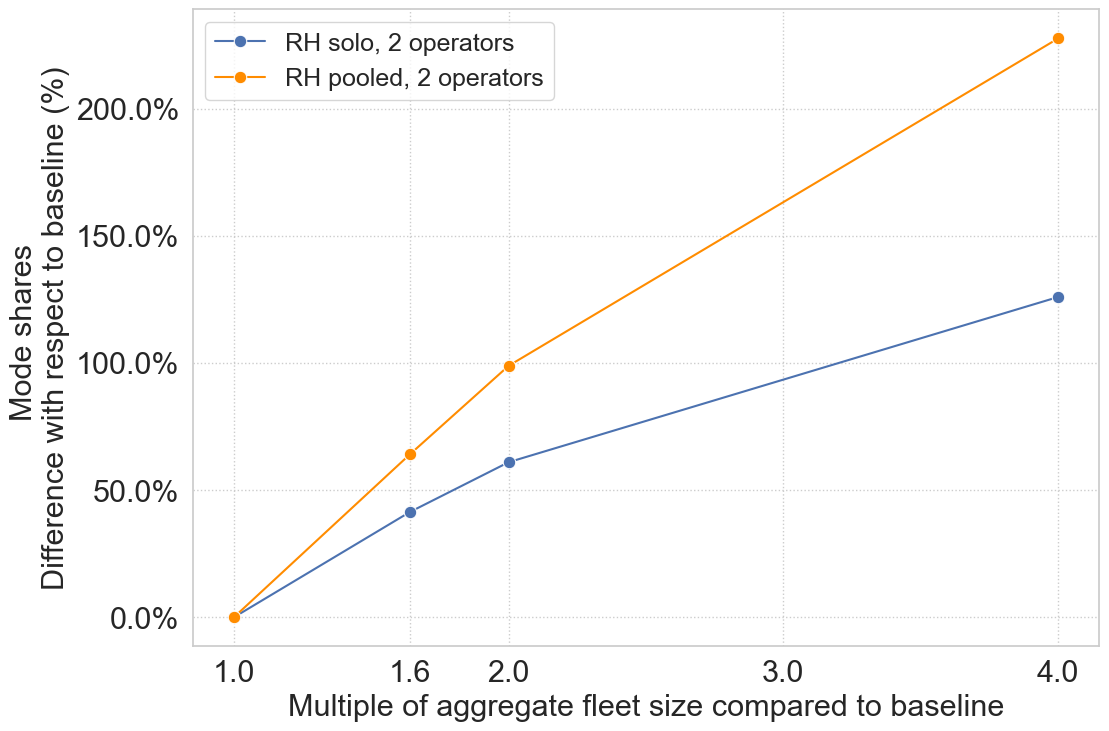

In [63]:
ax =sns.lineplot(
    data=constant_price.loc[(constant_price['Number of fleets'] == n_fleets_1) & 
                     (constant_price['RH Solo Price'] == price_rh_solo) & (constant_price['RH Pooled Price'] == price_rh_pooled)],
    x="Total fleet size", 
    y='rh_solo_share_pc_diff',
    marker = marker,
    markersize = markersize,
    color = 'b',
#    linestyle='--',
    label=f"RH solo, {n_fleets_1} operators")

ax3 =sns.lineplot(
    data=constant_price.loc[(constant_price['Number of fleets'] == n_fleets_1) &
                     (constant_price['RH Solo Price'] == price_rh_solo) & (constant_price['RH Pooled Price'] == price_rh_pooled)],
    x="Total fleet size", 
    y='rh_pooled_share_pc_diff',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    label=f'RH pooled, {n_fleets_1} operators')
ax.set_xticks([1.0,1.64,2.0,3.0,4.0])
plt.ylabel('Mode shares \nDifference with respect to baseline (%)', size=size)
plt.xlabel('Multiple of aggregate fleet size compared to baseline', size=size)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1%}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [64]:
all_data = pd.read_csv('all_data.csv')

In [65]:
all_data = all_data[all_data['RH Pooled Price']  > 0]
all_data = all_data[all_data['RH Solo Price']  > 0]

In [66]:
# Price variation on X axis
# Hold number of fleets constant at 5
# 2 lines: Pool and solo at fleet size = 1
# 2 lines: Pool and solo at fleet size = 4

In [67]:
# 1. New variable: diff in mode share wrt price=1, 5 fleets, fleet size = 1
# Location: 2
all_data['rh_solo_share_pc_diff_aux1']=((all_data['Trip Exec Share Ride Hail']-all_data['Trip Exec Share Ride Hail'].iloc[2])/all_data['Trip Exec Share Ride Hail'].iloc[2]) # minus baseline
all_data['rh_pooled_share_pc_diff_aux1']=((all_data['Trip Exec Share Ride Hail Pooled']-all_data['Trip Exec Share Ride Hail Pooled'].iloc[2])/all_data['Trip Exec Share Ride Hail Pooled'].iloc[2]) # minus baseline


In [68]:
# 1. New variable: diff in mode share wrt price=1, 5 fleets, fleet size = 4
# Location: 5
all_data['rh_solo_share_pc_diff_aux2']=((all_data['Trip Exec Share Ride Hail']-all_data['Trip Exec Share Ride Hail'].iloc[5])/all_data['Trip Exec Share Ride Hail'].iloc[5]) # minus baseline
all_data['rh_pooled_share_pc_diff_aux2']=((all_data['Trip Exec Share Ride Hail Pooled']-all_data['Trip Exec Share Ride Hail Pooled'].iloc[5])/all_data['Trip Exec Share Ride Hail Pooled'].iloc[5]) # minus baseline


In [69]:
# 1. New variable: diff in mode share wrt price=1, 2 fleets, fleet size = 1
# Location: 1
all_data['rh_solo_share_pc_diff_aux3']=((all_data['Trip Exec Share Ride Hail']-all_data['Trip Exec Share Ride Hail'].iloc[1])/all_data['Trip Exec Share Ride Hail'].iloc[1]) # minus baseline
all_data['rh_pooled_share_pc_diff_aux3']=((all_data['Trip Exec Share Ride Hail Pooled']-all_data['Trip Exec Share Ride Hail Pooled'].iloc[1])/all_data['Trip Exec Share Ride Hail Pooled'].iloc[1]) # minus baseline

# 2. New variable: diff in mode share wrt price=1, 2 fleets, fleet size = 4
# Location: 8

all_data['rh_solo_share_pc_diff_aux4']=((all_data['Trip Exec Share Ride Hail']-all_data['Trip Exec Share Ride Hail'].iloc[8])/all_data['Trip Exec Share Ride Hail'].iloc[8]) # minus baseline
all_data['rh_pooled_share_pc_diff_aux4']=((all_data['Trip Exec Share Ride Hail Pooled']-all_data['Trip Exec Share Ride Hail Pooled'].iloc[8])/all_data['Trip Exec Share Ride Hail Pooled'].iloc[8]) # minus baseline


# FINAL GRAPHS FOR PAPER

In [70]:
# Varying price

In [90]:
n_fleets = 5
fl_sz_1 = 1
fl_sz_2 = 4

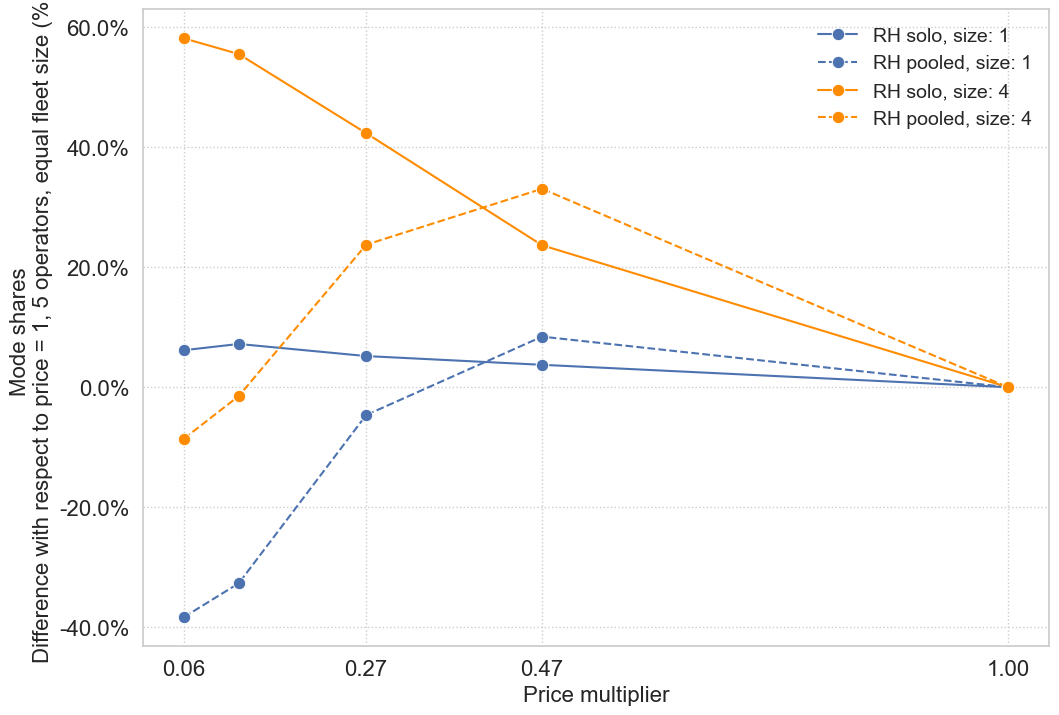

In [91]:
ax =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_1)],
    x="lever_position_price", 
    y='rh_solo_share_pc_diff_aux1',
    marker = marker,
    markersize = markersize,
    color = 'b',
    #linestyle='--',
    label=f"RH solo, size: {fl_sz_1}")

ax1 =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_1)],
    x="lever_position_price", 
    y='rh_pooled_share_pc_diff_aux1',
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle='--',
    label=f"RH pooled, size: {fl_sz_1}")

ax2 =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_2)],
    x="lever_position_price", 
    y='rh_solo_share_pc_diff_aux2',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    #linestyle='--',
    label=f"RH solo, size: {fl_sz_2}")

ax3 =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_2)],
    x="lever_position_price", 
    y='rh_pooled_share_pc_diff_aux2',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f"RH pooled, size: {fl_sz_2}")


ax.set_xticks([0.0625, 0.27, 0.47, 1.0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Mode shares \nDifference with respect to\n price = 1, 5 operators, equal fleet size (%)', size=16)
plt.xlabel('Price multiplier', size=16)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=14, frameon=False)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1%}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [73]:
# CHANGE COLOUR SCHEME OF THIS ONE?

In [74]:
# Choose parameters
n_fleets_1 = 2
n_fleets_2 = 5
price_rh_solo = 1
price_rh_pooled = 1

In [75]:
# Edits to plots

In [76]:
#Solo with 2 operators: orange solid
#Pool with 2 operators: orange dash
#Solo with 5 operators: blue solid
#Pool with 5 operators: blue dash
#Percentages instead of multipliers
# Operators instead of 'fleets'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


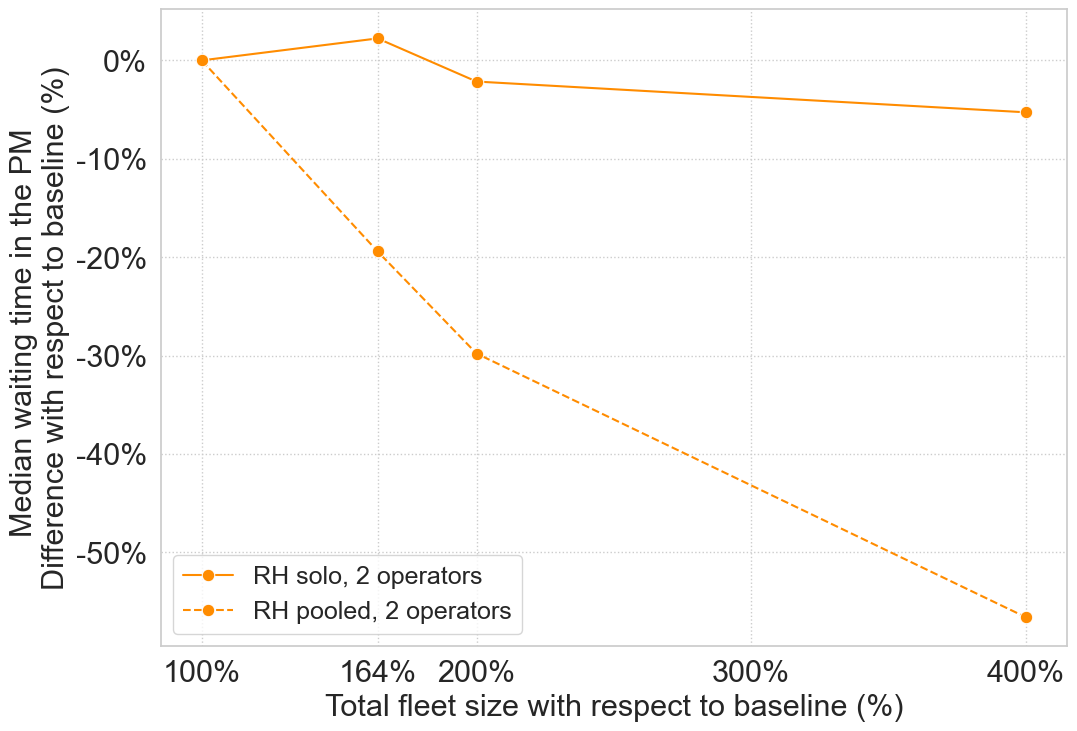

In [77]:
# Fig 5:
ax =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH solo') & 
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
#    linestyle='--',
    label=f"RH solo, {n_fleets_1} operators")

ax3 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f'RH pooled, {n_fleets_1} operators')
ax.set_xticks([1.0,1.64,2.0,3.0,4.0])
plt.ylabel('Median waiting time in the PM \nDifference with respect to baseline (%)', size=size)
plt.xlabel('Total fleet size with respect to baseline (%)', size=size)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


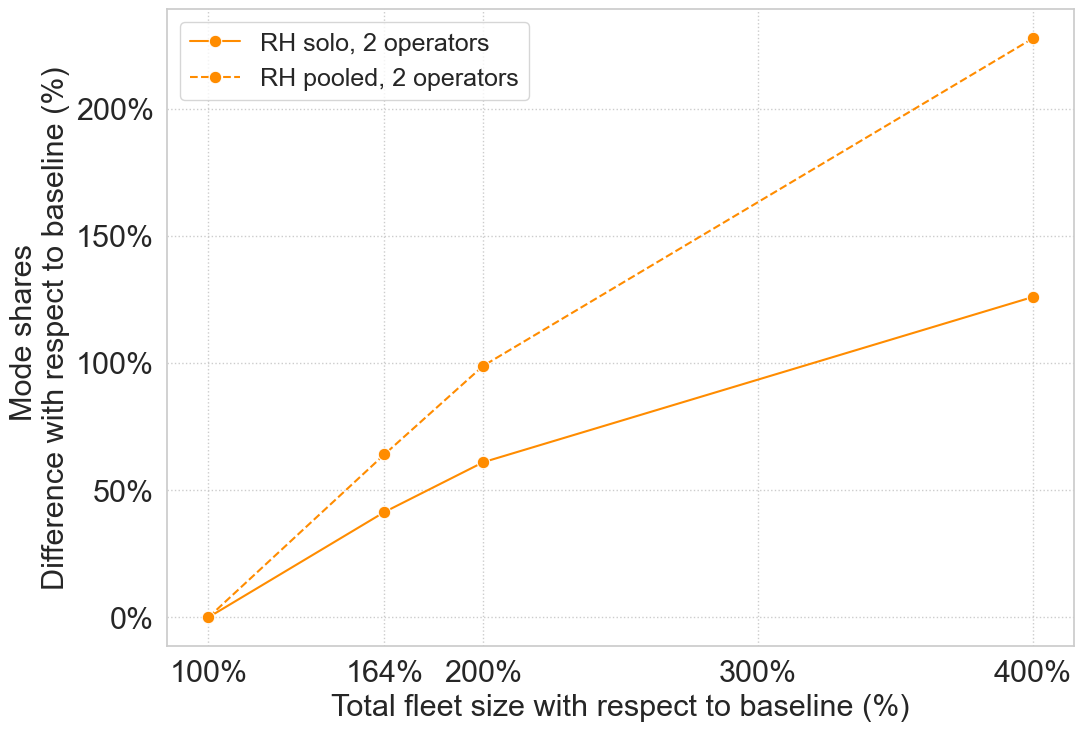

In [78]:
ax =sns.lineplot(
    data=constant_price.loc[(constant_price['Number of fleets'] == n_fleets_1) & 
                     (constant_price['RH Solo Price'] == price_rh_solo) & (constant_price['RH Pooled Price'] == price_rh_pooled)],
    x="Total fleet size", 
    y='rh_solo_share_pc_diff',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
#    linestyle='--',
    label=f"RH solo, {n_fleets_1} operators")

ax3 =sns.lineplot(
    data=constant_price.loc[(constant_price['Number of fleets'] == n_fleets_1) &
                     (constant_price['RH Solo Price'] == price_rh_solo) & (constant_price['RH Pooled Price'] == price_rh_pooled)],
    x="Total fleet size", 
    y='rh_pooled_share_pc_diff',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f'RH pooled, {n_fleets_1} operators')
ax.set_xticks([1.0,1.64,2.0,3.0,4.0])
plt.ylabel('Mode shares \nDifference with respect to baseline (%)', size=size)
plt.xlabel('Total fleet size with respect to baseline (%)', size=size)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [79]:
# Choose parameters
n_fleets_1 = 2
n_fleets_2 = 5
price_rh_solo = 1
price_rh_pooled = 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


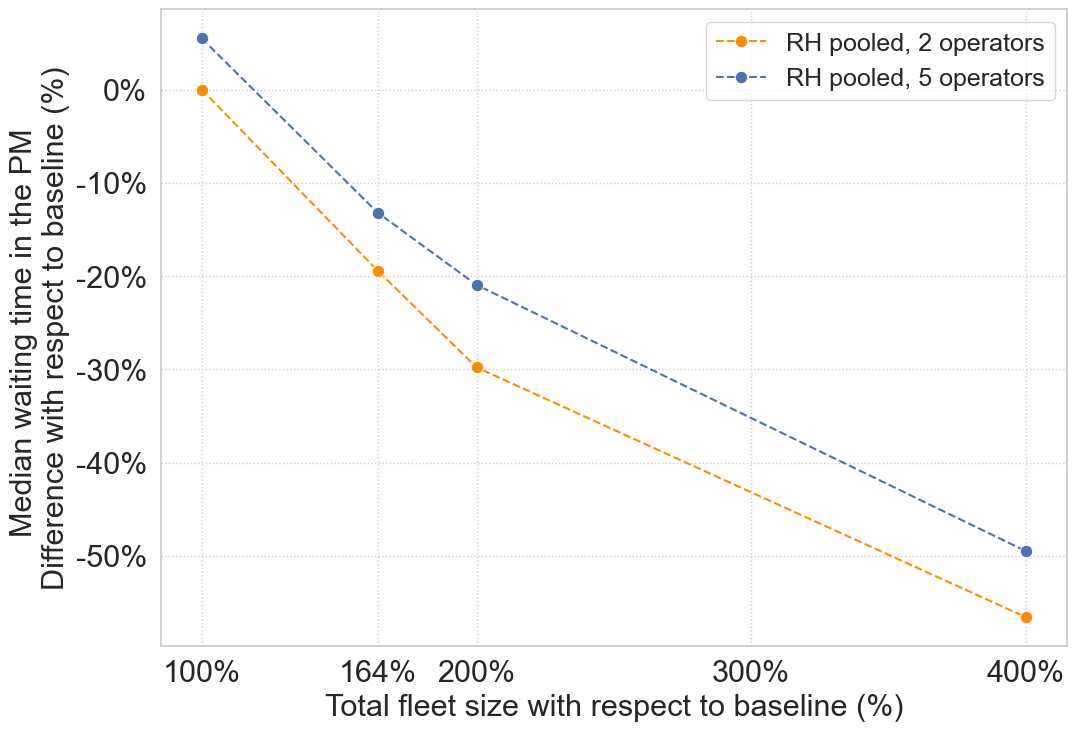

In [80]:
ax1 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle = '--',
    label=f'RH pooled, {n_fleets_1} operators')

ax2 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="pc_diff",
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle = '--',
    label=f'RH pooled, {n_fleets_2} operators')
ax1.set_xticks([1.0,1.64,2.0,3.0,4.0])
plt.ylabel('Median waiting time in the PM \nDifference with respect to baseline (%)', size=size)
plt.xlabel('Total fleet size with respect to baseline (%)', size=size)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [81]:
# Choose parameters
n_fleets_1 = 2
n_fleets_2 = 5
price_rh_solo = 1
price_rh_pooled = 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


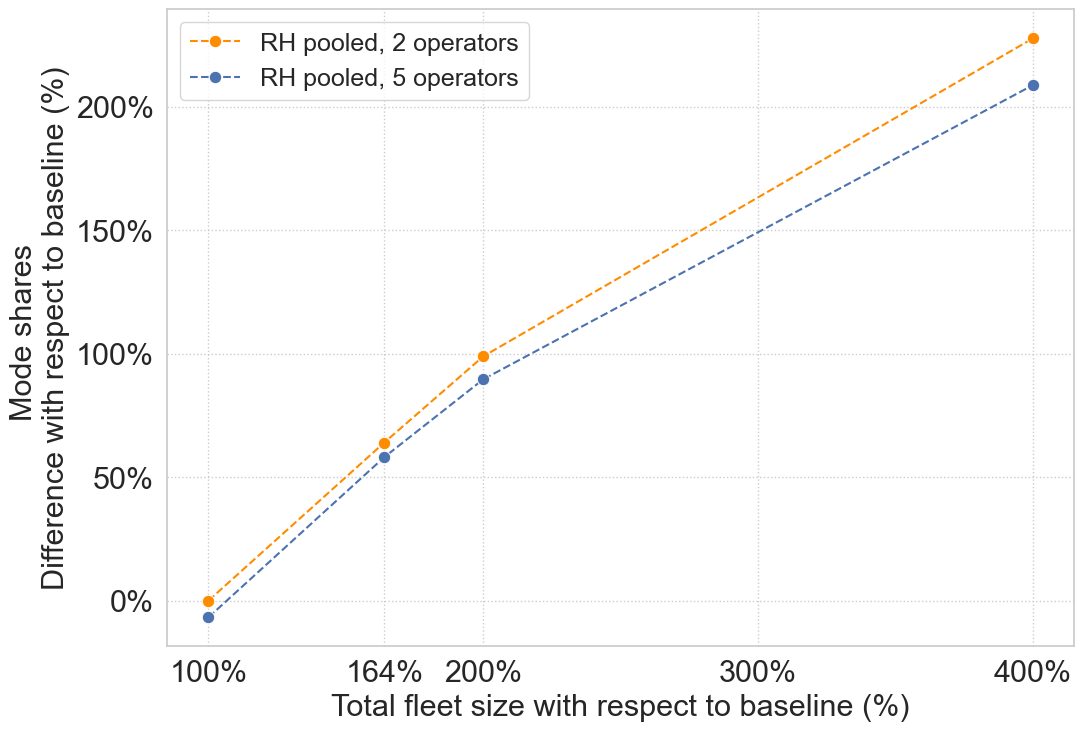

In [82]:
ax =sns.lineplot(
    data=constant_price.loc[(constant_price['Number of fleets'] == n_fleets_1) & 
                     (constant_price['RH Solo Price'] == price_rh_solo) & (constant_price['RH Pooled Price'] == price_rh_pooled)],
    x="Total fleet size", 
    y='rh_pooled_share_pc_diff',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f"RH pooled, {n_fleets_1} operators")

ax3 =sns.lineplot(
    data=constant_price.loc[(constant_price['Number of fleets'] == n_fleets_2) &
                     (constant_price['RH Solo Price'] == price_rh_solo) & (constant_price['RH Pooled Price'] == price_rh_pooled)],
    x="Total fleet size", 
    y='rh_pooled_share_pc_diff',
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle='--',
    label=f'RH pooled, {n_fleets_2} operators')
ax.set_xticks([1.0,1.64,2.0,3.0,4.0])
plt.ylabel('Mode shares \nDifference with respect to baseline (%)', size=size)
plt.xlabel('Total fleet size with respect to baseline (%)', size=size)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [92]:
# Choose parameters
n_fleets = 5
price_rh_solo = 1
price_rh_pooled = 1

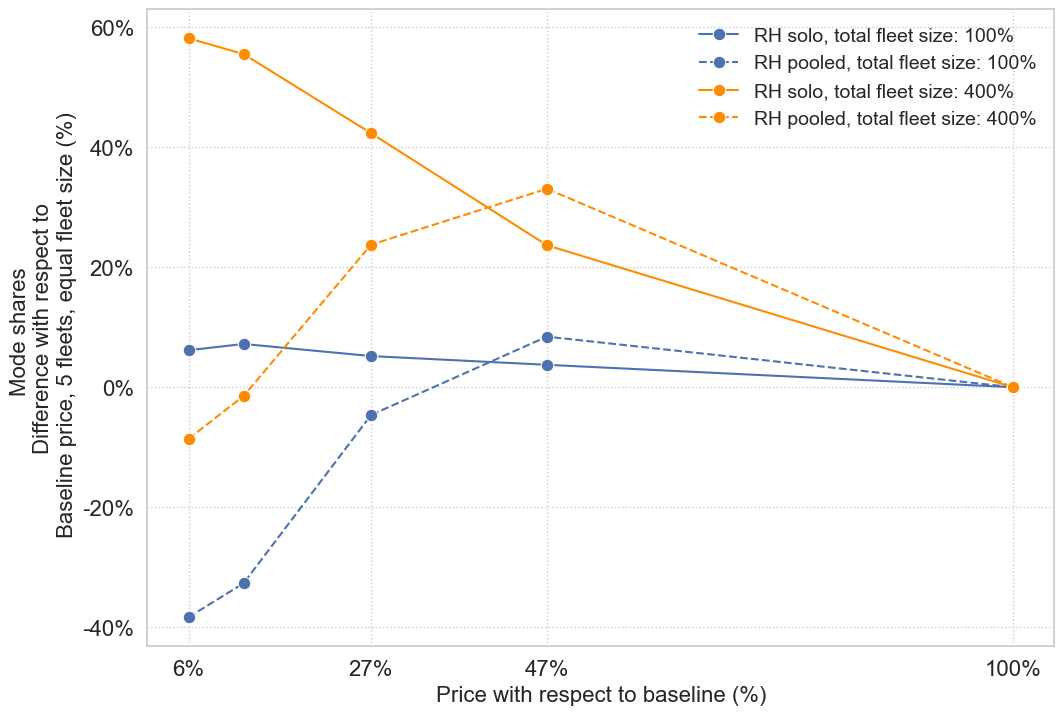

In [94]:
# Repeating with two fleets
ax =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_1)],
    x="lever_position_price", 
    y='rh_solo_share_pc_diff_aux1',
    marker = marker,
    markersize = markersize,
    color = 'b',
    #linestyle='--',
    label=f"RH solo, total fleet size: 100%")

ax1 =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_1)],
    x="lever_position_price", 
    y='rh_pooled_share_pc_diff_aux1',
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle='--',
    label=f"RH pooled, total fleet size: 100%")

ax2 =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_2)],
    x="lever_position_price", 
    y='rh_solo_share_pc_diff_aux2',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    #linestyle='--',
    label=f"RH solo, total fleet size: 400%")

ax3 =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_2)],
    x="lever_position_price", 
    y='rh_pooled_share_pc_diff_aux2',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f"RH pooled, total fleet size: 400%")


ax.set_xticks([0.0625, 0.27, 0.47, 1.0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Mode shares \nDifference with respect to\n Baseline price, 5 fleets, equal fleet size (%)', size=16)
plt.xlabel('Price with respect to baseline (%)', size=16)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=14, frameon=False)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

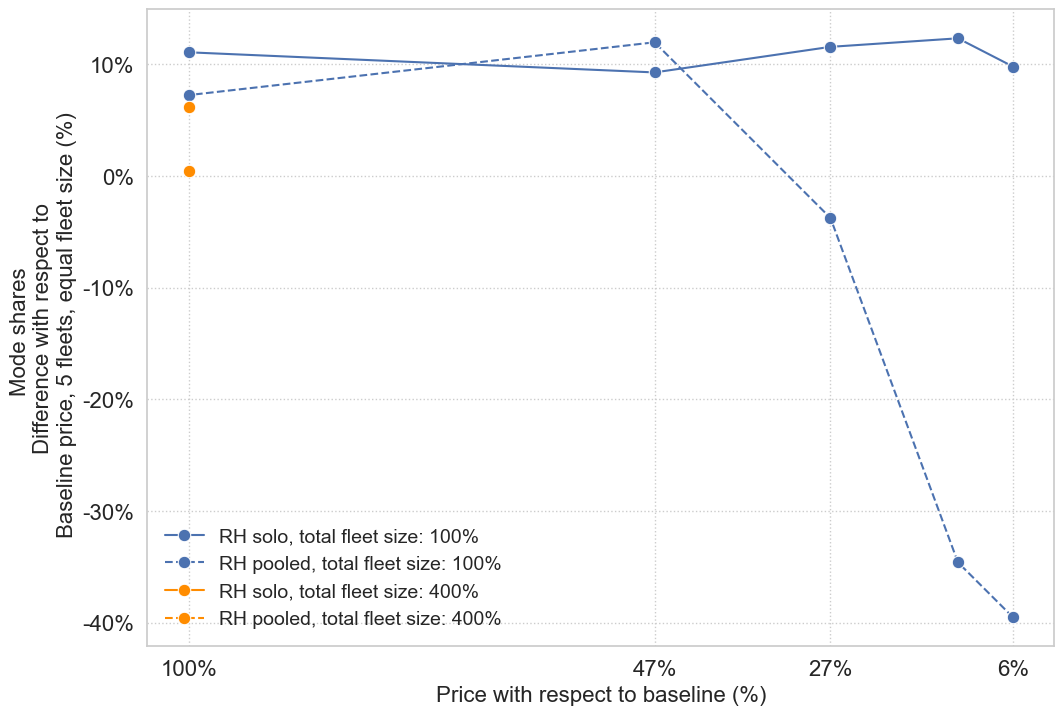

In [85]:
# Reversed x axis
ax =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_1)],
    x="lever_position_price", 
    y='rh_solo_share_pc_diff_aux1',
    marker = marker,
    markersize = markersize,
    color = 'b',
    #linestyle='--',
    label=f"RH solo, total fleet size: 100%")

ax1 =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_1)],
    x="lever_position_price", 
    y='rh_pooled_share_pc_diff_aux1',
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle='--',
    label=f"RH pooled, total fleet size: 100%")

ax2 =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_2)],
    x="lever_position_price", 
    y='rh_solo_share_pc_diff_aux2',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    #linestyle='--',
    label=f"RH solo, total fleet size: 400%")

ax3 =sns.lineplot(
    data=all_data.loc[(all_data['Number of fleets'] == n_fleets) & 
                     (all_data['Total fleet size'] == fl_sz_2)],
    x="lever_position_price", 
    y='rh_pooled_share_pc_diff_aux2',
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f"RH pooled, total fleet size: 400%")


ax.set_xticks([1.0, 0.47, 0.27, 0.0625])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Mode shares \nDifference with respect to\n Baseline price, 5 fleets, equal fleet size (%)', size=16)
plt.xlabel('Price with respect to baseline (%)', size=16)
#plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=14, frameon=False)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # 2 decimal places
plt.gca().invert_xaxis()
plt.savefig('rh_price_waits.eps')

In [86]:
df_joint.head()

Unnamed: 0,25%,50%,75%,count,max,mean,min,std,price_solo,price_pooled,size,n_fleets,Type,pc_diff
run,,,,,,,,,,,,,,
3,2.500000,3.575000,4.783340,1263.0,14.083333,3.758388,0.0,1.945719,1.0,1.0,1.00,1,RH solo,0.052395
4,2.283333,3.397014,4.617778,1276.0,13.983334,3.579523,0.0,1.951766,1.0,1.0,1.00,2,RH solo,0.000000
5,2.033333,3.025000,4.331667,1262.0,13.683333,3.353900,0.0,1.974348,1.0,1.0,1.00,5,RH solo,-0.109512
6,2.137292,2.998958,4.059028,1344.0,14.283334,3.261222,0.0,1.772646,1.0,1.0,1.64,5,RH solo,-0.117178
7,2.105238,2.936932,3.867709,1346.0,12.366667,3.140928,0.0,1.634482,1.0,1.0,2.00,5,RH solo,-0.135437


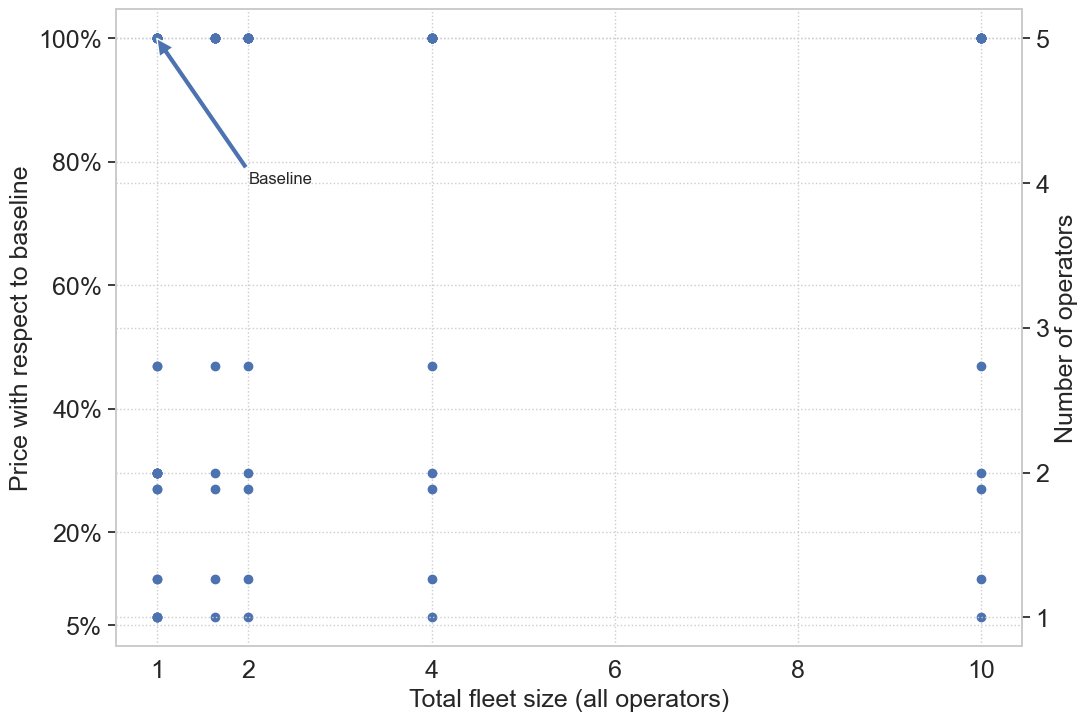

In [87]:
import matplotlib.ticker as mticker
# Generate some sample data
x = df_solo['size']
y1 = df_solo['price_solo']
y2 = df_solo['n_fleets']

# Create a custom tick formatter for y-axis
def percentage_formatter(x, pos):
    return '{:.0%}'.format(x)

dec_formatter = ticker.StrMethodFormatter('{x:.0f}')

# Create the figure and axes objects
fig, ax1 = plt.subplots()

# Create the scatter plot for y1 on the primary y-axis
ax1.scatter(x, y1, color='b')
ax1.set_xlabel('Total fleet size (all operators)', fontsize = 18)
ax1.set_ylabel('Price with respect to baseline', fontsize = 18)
ax1.set_yticks([0.05, 0.2, 0.4, 0.6, 0.8, 1])
ax1.set_xticks([1, 2, 4, 6, 8, 10])
ax1.tick_params(axis='y', labelsize = 18)
ax1.tick_params(axis='x', labelsize = 18)
# Create a twin y-axis
ax2 = ax1.twinx()

# Create the scatter plot for y2 on the secondary y-axis
ax2.scatter(x, y2, color='b') 
ax2.set_ylabel('Number of operators', fontsize = 18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_yticks([1.0, 2.0, 3.0, 4.0, 5.0])
ax2.yaxis.set_major_formatter(dec_formatter)

# Apply the formatter to the y-axis
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(percentage_formatter))

# Select a point to annotat

# Add an arrow annotation
#plt.annotate("", xy=(3, 5), xytext=(2, 2),
             #arrowprops=dict(arrowstyle='->'))

#plt.arrow(4,4,1,2, width=0.2)    

plt.annotate('Baseline', xy=(1,5), xytext=(2,4), arrowprops={})
    
# Add legends
#lines = ax1.get_legend_handles_labels()[0] + ax2.get_legend_handles_labels()[0]
#labels = ax1.get_legend_handles_labels()[1] + ax2.get_legend_handles_labels()[1]
#ax1.legend(lines, labels, loc = 'center', fontsize = 18) # only if splitting

# Display the plot
plt.show()

